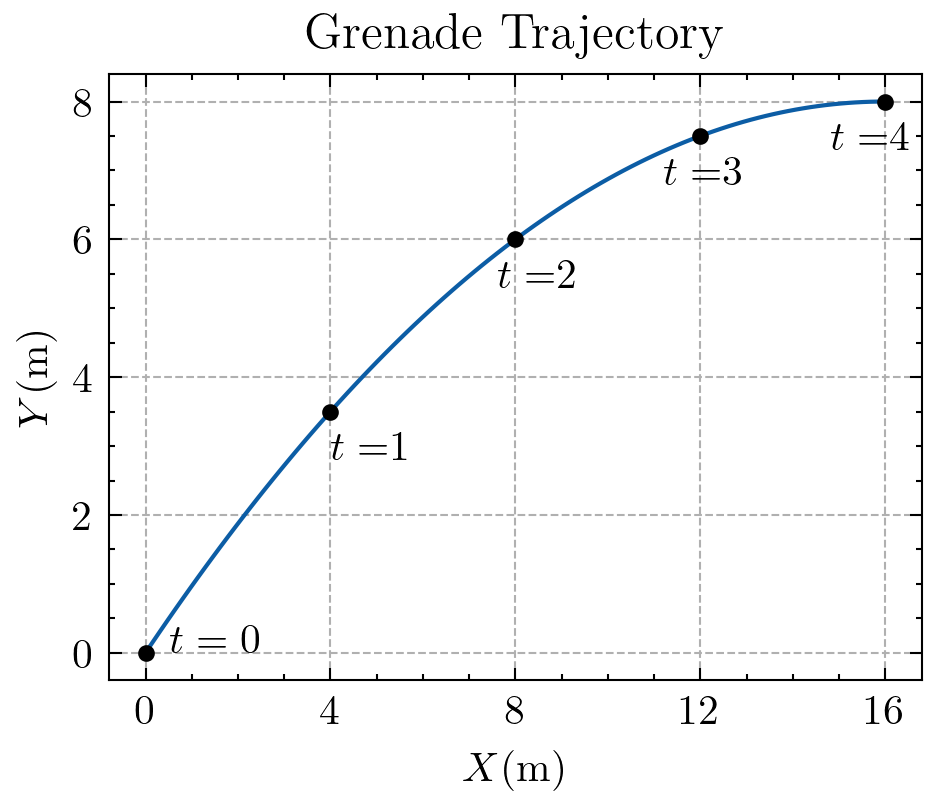

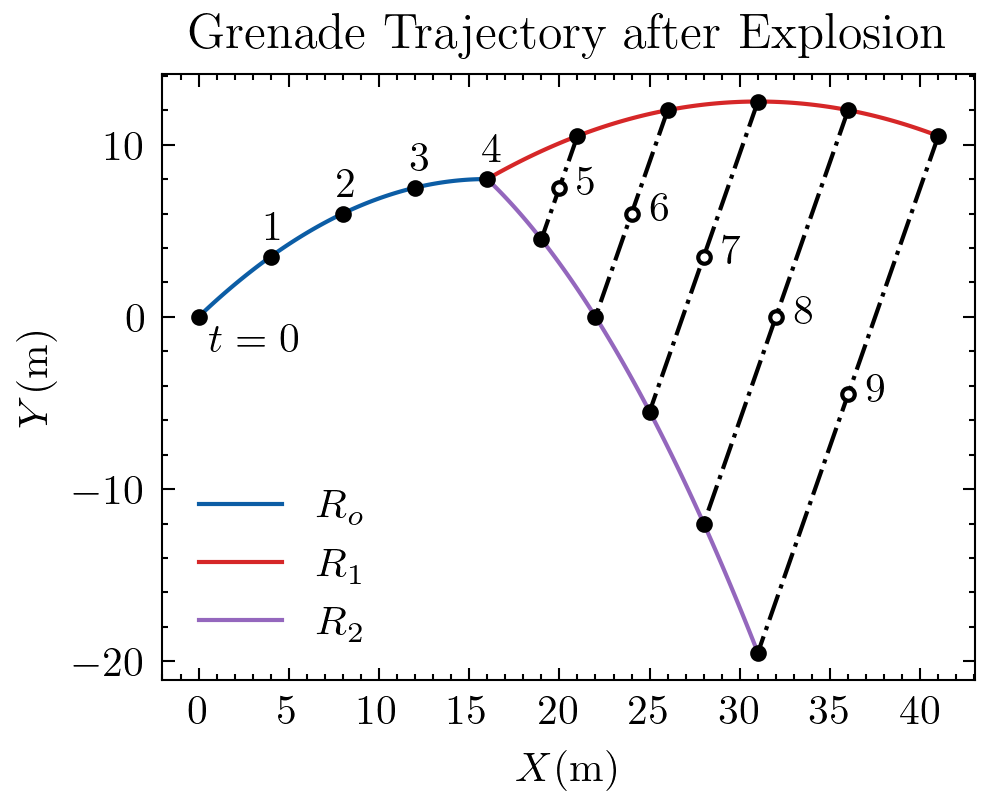

In [177]:
# 3.23
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

# change dpi 
plt.rcParams['figure.dpi'] = 300

# constants
g = 1; vx = 4; vy = 4
t = np.linspace(0, 4, 100)

# equations
x = vx * t
y = vy * t - 0.5 * g * t**2
def xf(t):
    return vx * t
def yf(t):
    return vy * t - 0.5 * g * t**2

# plot
plt.plot(x, y)
plt.plot([0, xf(1), xf(2), xf(3), xf(4)], [0, yf(1), yf(2), yf(3), yf(4)], 'ko', markersize=3)
for i, txt in enumerate(['1', '2', '3', '4']):
    plt.annotate('$t=$' + txt, (xf(i+1)-0.4*i, yf(i+1)-0.7))
plt.annotate('$t = 0$', (0.5, 0))
plt.xticks(np.arange(0, 20, 4))
plt.yticks(np.arange(0, 10, 2))
plt.xlabel('$X$(m)')
plt.ylabel('$Y$(m)')
plt.grid(True, linestyle='--')
plt.title('Grenade Trajectory')

# using vectors for equations of motion
# solving for initial velocity at t = 4 before explosion
vyo = vy - g * 4
vxo = vx
v_o = np.array([vxo, vyo])

# velocities after explosion
dv = np.array([1, 3])
v_1o = v_o + dv
v_2o = v_o - dv

# constants
t_vector = np.linspace(4, 9, 100)
g_vector = np.array([0, 1])

# equation of motion in vector form
r1 = np.zeros((len(t_vector)+1, 2))
r2 = np.zeros((len(t_vector)+1, 2))
r1[0] = np.array([xf(4), yf(4)]) 
r2[0] = np.array([xf(4), yf(4)])
for i, val in enumerate(t_vector):
    time = val - 4
    r1[i+1] = r1[0] + v_1o * time - 0.5 * g_vector * time**2 
    r2[i+1] = r2[0] + v_2o * time - 0.5 * g_vector * time**2
# as a function of t
def r1f(t):
    return r1[0] + v_1o * (t-4) - 0.5 * g_vector * (t-4)**2
def r2f(t):
    return r2[0] + v_2o * (t-4) - 0.5 * g_vector * (t-4)**2

# plotting the trajectories
plt.figure(2)
plt.plot(x, y)
plt.plot(r1[:, 0], r1[:, 1], 'tab:red')
plt.plot(r2[:, 0], r2[:, 1], 'tab:purple')

# plotting the points for t = [0,4]
plt.plot([0, xf(1), xf(2), xf(3), xf(4)], [0, yf(1), yf(2), yf(3), yf(4)], 'ko', markersize=3)
plt.annotate('$t = 0$', (0.5, -2)) # at origin t = 0
for i, txt in enumerate(np.arange(1, 5, 1)):
    plt.annotate(txt, (xf(i+1)-.3, yf(i+1)+1))

# plot line between points and its midpoint
# plt.plot([r1f(5)[0],r2f(5)[0]], [r1f(5)[1], r2f(5)[1]], 'k--')
# into a for loop
for i, val in enumerate(np.arange(5, 10, 1)):
    plt.plot([r1f(val)[0],r2f(val)[0]], [r1f(val)[1], r2f(val)[1]], 'k-.')
    plt.plot([(r1f(val)[0]+r2f(val)[0])/2], [(r1f(val)[1]+r2f(val)[1])/2], 'ko', 
            markerfacecolor='white', markersize=3)
    plt.annotate(str(val), ((r1f(val)[0]+r2f(val)[0])/2+1, (r1f(val)[1]+r2f(val)[1])/2-0.4))

# plot points for t = [5,9]
for i, val in enumerate(np.arange(5, 10, 1)):
    plt.plot(r1f(val)[0], r1f(val)[1], 'ko', markersize=3)
    plt.plot(r2f(val)[0], r2f(val)[1], 'ko', markersize=3)

# labels and axes
plt.legend(['$R_o$', '$R_1$', '$R_2$'])
plt.title('Grenade Trajectory after Explosion')
plt.xlabel('$X$(m)')
plt.ylabel('$Y$(m)')
# plt.grid(True, linestyle='--')
plt.xticks(np.arange(0, 45, 5))
plt.show()